<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/MI/BSc_MI_labor_4_D%C3%B6nt%C3%A9si_f%C3%A1k_HU_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

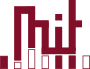 Mesterséges Intelligencia és Rendszertervezés Tanszék, ©2024. BME-MIT, Alekszejenkó Levente, Dr. Hullám Gábor  
# **VIMIAC16 - Mesterséges Intelligencia**
## 2024. Őszi félév
## **4. Laborgyakorlat**

# **Döntési fák**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!wget https://share.mit.bme.hu/index.php/s/9ag8JsRD9mXWj85/download/dataset.csv

## **1. Elméleti háttér**

A döntési fák (decision tree) talán az emberi gondolkodáshoz legközelebb álló, intuitív osztályozók (classifier). Általában relatíve kevés adattal is hatékonyan taníthatóak, és a struktúrájuk *emberi szemmel* is érthető. Egyszerűségük ellenére is igen jó előrejelző teljesítményt nyújtanak, így sikeresen alkalmazhatóak különböző területeken az orvosi döntéstámogatástól kezdve, az üzleti életen át az ajánló rendszerekig (recommender systems).


![dtree](https://share.mit.bme.hu/index.php/apps/files_sharing/publicpreview/5GAKgGAAErwLr6n?file=/&fileId=3815291&x=1920&y=1080&a=true&etag=c084366203833f27c25fe8d16bbeb250)

### Áttekintés

Osztályozási feladatoknál az adatunk megadható táblázatos formában, például így:

| Tulajdonság$_A$| Tulajdonság$_B$| Címke |
| :-----------: | :-----------: | :---: |
|      1        |      2        |   o   |
|      2        |      7        |   o   |
|     12        |      4        |   x   |
|     ...       |     ...       |  ...  |

Ebben a példában a Tulajdonság$_A$ és Tulajdonság$_B$ oszlopokban valamilyen ismert tulajdonságok (feature) szerepelnek, míg a Címke (label) oszlop a döntés kimenetelét szimbolizálja. Például, ha $A = 2$ és $B = 7$, akkor a célváltozónk az o kategóriába fog esni, azonban $A = 12$ és $B = 4$ esetén az x-be.

Ugyanez természetesen az $(A \times B)$ térbe is felrajzolható:

![illustration](https://share.mit.bme.hu/index.php/apps/files_sharing/publicpreview/jJwKaRxqQS7WJy7?file=/&fileId=3815472&x=1920&y=1080&a=true&etag=53f8a992384228edc0a5f1c9920f6c77)

Két tulajdonság esetén a probléma könnyen ábrázolható a síkon, viszont $n$ tulajdonság esetén $n$-dimenziós terekkel kell dolgoznunk. Ezt persze már nehéz elképzelni grafikusan, de egy konkrét változó lefixálása mellett a bemutatott módszer általánosítható $n-1$ dimenziós hipersíkokkal.


### **1.1 Minták szeparációja**

Körvonalazódni látszik tehát egy algoritmus, mely a tulajdonságtér felosztásával megoldja a klasszifikációs feladatunkat. A célunk tehát az, hogy olyan rekurzív felosztásokat hozzunk létre, melyek végeredményként a lehető legjobban elválasztják a különbözően címkézett adatpontokat. Ezt úgy is megfogalmazhatjuk, hogy a felosztások két oldalán kialakuló adatpontok rendezettlensége legyen a lehető legkisebb.

Első közelítésben (és nem mellesleg ahhoz, hogy döntési fákat kapjunk) próbáljuk meg a tulajdonságok terét a tulajdonságok értékeinél egy-egy egyenessel (grafikusan: a tengelyekkel párhuzamos egyenesekkel) két részre bontani.

![separations](https://share.mit.bme.hu/index.php/apps/files_sharing/publicpreview/fYDnEzPdzHXKNGD?file=/&fileId=3815457&x=1920&y=1080&a=true&etag=eb7584e97ad02851a9ae9daae8dca167)

Figyeljük meg a különböző felosztáspéldákat! Az 1) esetben nem nyertünk sokat, legfeljebb annyit, hogy egyetlen piros o-ról tudjuk, hogy ettől az egyenestől balra található, azonban tőle jobbra teljesen vegyesen vannak o és x címkéjű elemek.

A 2) és 3) felosztási lehetőséget jobban megvizsgálva láthatjuk, hogy a 2)-es bizonyos értelemben jobb, mint a 3)-as: a 2)-es egyenestől balra 2 darab x címkéjű elem található, míg tőle jobbra egyetlen o. Eközben a 3)-as esetében az elválasztó egyenes alatt 3 o található, felette pedig 2 x.

Ahhoz, hogy ezt a minőségi eltérést számszerűsíteni tudjuk, meg kell mérnünk a rendezetlenséget, hiszen a rendezetlenség kapcsolatba hozható a helyesen és helytelenül osztályozott példákkal.

### **1.2 Entrópia**

Kódolástechnikából vagy információelméletből ismerős fogalom lehet a rendezetlenség mértékeként a (Shannon-féle) entrópia ($H$):

> $H = - \sum_{x \in X} p(x) \cdot \log_2 p(x)$,

ahol $X$ a *címkeértékek* halmaza.

Ha egy halmaz teljesen rendezett, azaz csak egyféle címkét tartalmaz, akkor az entrópiája $H = 0$ lesz.

**Implementáljon egy kétosztályos entrópiaszámító függvényt!** Megoldásához bátran használja a `np.log2()` függvényt!

In [ ]:
def get_entropy(n_label0: int, n_label1: int) -> float:
  '''
    Returns the entropy of a binary classification.
    Parameters:
      - n_label0: number of "0"-labeled records
      - n_label1: number of "1"-labeled records
  '''
  ####################################
  #Írja ide a szükséges forráskódot:

  ####################################
  return h

#### *Ellenőrzés*:

Helyes implmentáció esetén a következő cella lefuttatása után rendre kb. a következő eredményt kell kapnia:

`[0.0, 1.0, 0.8113]`

In [ ]:
entropies = [get_entropy(12, 0), get_entropy(6, 6), get_entropy(3, 9)]
print(entropies)

### **1.3 Információnyereség és struktúratanulás**

Specifikáljunk most egy igen egyszerű, mohó módszert döntési fák tanulására!

Jelöljük $H(L)$-lel a kiindulási entrópiát, és végezzünk el egy $x$ tulajdonság menti felosztást $x \leq a$ határnál. Vizsgáljuk meg a felosztási határ alatt maradó pontok entrópiáját, és jelöljük ezt $H(L | x \leq a)$-val. Hasonló módon kapunk egy másik halmazt is a felosztási határ felett, mely entrópiáját $H(L | x > a)$-val jelölhetjük.

Vezessük be a következő jelöléseket: $e := |\{L | x \leq a\}|$ és $f := |\{L | x > a\}|$ a felosztási határ alá, illetve fölé eső minták számának jelölésére. Természetesen adódik, hogy $|L| = e+f$.

A felosztás hatékonysága így nem más, mint $H(L) - \Big(\frac{e}{|L|} \cdot H(L | x \leq a) + \frac{f}{|L|} \cdot H(L | x > a)\Big)$, amit *információnyereségnek* hívunk. Azaz egy döntés hasznosságát úgy definiálhatjuk, mint a döntés során kialakuló kisebb halmazok (mintaszámmal súlyozott) entrópiájának és a kiindulási entrópiának a különbségét.

**Implementáljon egy információnyereség-számító függvényt!** Megoldásához természetesen használja az előző feladatban implementált `get_entropy()` függvényt!

In [ ]:
def get_information_gain(x: np.ndarray, y: np.ndarray, x_separation: float) -> float:
  '''
    Returns the information gain given a feature set, a label set,
    and a separation level.
    Parameters:
      x: set of features,
      y: set of labels,
      x_separation: separation level
  '''
  ####################################
  #Írja ide a szükséges forráskódot:

  ####################################
  return gain

#### *Ellenőrzés:*

Tekintse meg az eddig elkészült megoldásokat a következő cellák futtatásával. A második cella futtatása után használhatóvá válik a csúszka, melynek mozgatása után automatikusan újrafuttatódik a cella.

In [ ]:
x_plot0 = np.random.normal(0, 4.5, 50)
x_plot1 = np.random.normal(10, 4.5, 50)
y_plot0 = np.random.normal(0, 3, 50)
y_plot1 = np.random.normal(0, 3, 50)

best_gain, best_gain_x = 0, 0

In [ ]:
# @title Egy döntés {run: "auto"}

slider = 0.0 # @param {type: "slider", min:-10, max: 20, step: 0.5}

#plotting:
plt.scatter(x_plot0, y_plot0, marker="o", color="tab:red")
plt.scatter(x_plot1, y_plot1, marker="x", color="navy")
plt.vlines(x = slider, ymin=-9, ymax=9, linewidth=3, alpha=0.6, color="k")
plt.xlim(-10, 20)
plt.ylim(-10, 10)

#computing information gain:
x = np.concatenate([x_plot0, x_plot1])
y = [0]*50+[1]*50
act_gain = get_information_gain(x, y, slider)
if act_gain>best_gain:
  best_gain = act_gain
  best_gain_x = slider

#printing gains:
print(f"Actual gain: {act_gain:.4f}\nBest gain so far: {best_gain:.4f} @ x={best_gain_x}")

Ebből talán már következik is egy mohó algoritmus: vegyük szisztematikusan az *összes lehetséges* szeparációt, és válasszuk ezek közül azt, aminél az információnyereség maximális. Jegyezzük fel a döntési tulajdonságot, és a döntési határt, ugyanis ez lesz a döntési fánk *döntési csomópontja*. A szeparáció által létrejött két kisebb halmazunk (melyek nem feltételnül rendezettek). Amennyiben ezek egyike teljesen rendezett, azaz csak egyféle címkét tartalmaz, így entrópiája 0.0, akkor az a döntési fa egy levele, azaz egy adekvát *döntés* lesz. Ellenkező esetben még mindig egy rendezetlen halmazzal van dolgunk, így az algoritmust ezen a részhalmazon rekurzíve folytatjuk tovább, és a korábbi döntési csomópont egyik gyerekeként fogjuk szerepeltetni az általa kapott eredményeket (részfát).

Alapvetően ez az algoritmus persze nem lesz optimális, hiszen a kapott döntési fa komplexitása túlságosan nagy lesz, mely ront a fa általánosító képességén. A kialakult fát optimálissá lehet tenni csomópontok összevonásával, a döntési fa nyírásával (pruning).

## **2. Döntési fa tanítása**

Természetesen a fent említett algoritmusnak létezik hatékony implementációja. Jelen laboron az `sklearn` sokoldalú MI-s Python-csomag által biztosított `DecisionTreeClassifier` használatával fogunk megismerkedni.

A következőkben egy használtautó-adatbázissal fogunk dolgozni. Az adatbázis különböző járművek rekordjait tartalmazza, melyet egy használtautó-kereskedő kínál. A kereskedő egyik ügyfele megjelölte *valamilyen szempont* szerint azon járműveket, melyeket meg szeretne tekinteni. A feladatunk, hogy megtanuljuk a vásárló szempontjait (így további, számára tetsző autókat is tudunk neki mutatni).

**Első lépésként töltse be és tekintse át az adathalmazt!** Az ügyfél döntéseit a `decision` oszlopban találja, mely `True`, ha meg szeretné tekinteni az adott autót, különben pedig `False` értéket vesz fel. Az adathalmaz részletes ismertetését megtekintheti [itt](https://share.mit.bme.hu/index.php/s/w3okwHpzCF5NSKM).

In [ ]:
cars_df = pd.read_csv('dataset.csv')
cars_df

### 2.1 Adatelőkészítés

Az `sklearn` csomag `DecisionTreeClassifier` implementációja sajnos nem képes szöveges tulajdonságokat kezelni. Ezért a `manufacturer` és `model` oszlopainkat számmá kell konvertálnunk. Erre a célra jelen esetben megoldás a `sklearn.preprocessing.OrdinalEncoder` [osztály](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#ordinalencoder) használata. Ez sajnos *nem egy általános megoldás*! Jelen esetben a döntési fákon alapuló modell miatt használhatjuk, hiszen itt legfeljebb mélyebb fát kapunk, viszont más modellek (pl. a neurális hálók) kihasználhatják az adatok terében rejlő közelségeket.

**Konvertálja számmá a kategorikus tulajdonságokat!** Figyelem: az `OrdinalEncoder` 2-dimenziós bemenetet vár, azonban a `pandas.DataFrame` oszlopai 1-dimenziós, `Series` típust adnak vissza. Az átkonvertáláshoz használható például a következő kód:

```python
np.array(cars_df["manufacturer"].reshape(-1, 1))
```

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oencoder_manufacturer = OrdinalEncoder()
oencoder_model = OrdinalEncoder()

####################################
# Bővítse megfelelően a következő forráskódsorokat:

####################################

**Válassza szét a kapott adathalmazt tanító és tesztadatra a következő cella futtatásával!**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cars_df.drop(columns=["decision"]),              #features
    cars_df["decision"],                             #labels
    test_size=0.2                                    #80% -> train, 20% -> test
)

### 2.2 Tanítás

**Az adatok előkészítése után tanítsa be a döntési fát!** Első körben egy 1-mélységű fát fogunk készíteni, és elemezzük annak osztályozó képességét. Jelen laborban az entrópiát (`entropy`) kell rendezőelvnek tekinteni. Futtassa le a következő cellát a döntési fa tanításához!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=1, criterion="entropy")
dtree = dtree.fit(X_train, y_train)

**Tekintsük meg az elkészült döntési fát!**

In [ ]:
# A döntési fa ábrázolása
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns, class_names=['nem tekintjük meg','megtekintjük'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 2.3 Döntési fa tesztelése

Amint látható, az 1-mélységű fa egyik levelében még vegyesen találhatóak jó és nem megfelelő gépkocsik (lásd: entropy$\neq$0, a value vegyesen tartalmaz mintákat). **A következő cella futtatásával végezzen el egy következtető lépést a tesztadatokon!**

In [ ]:
y_pred = dtree.predict(X_test)

Ahhoz, hogy megítéljük, mennyire sikerült jól osztályozni az egyes járműveket, különböző metrikákat használhatunk. Szerencsére az `sklearn` csomag számos kiértékelési mértéket implementál, tekintsünk meg most ezek közül néhányat!

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Amint láthatjuk, a modellünk egészen pontos (*accuracy*), azonban még bizonyosan vannak rosszul besorolt járművek. **Tekintse meg, hogy mennyi és milyen típusú hibát vét az első döntési faimplementációnk a következő cella futtatásával!**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### 2.4 Mélyebb döntési fa

Ahogy látható, az 1-mélységű döntési fa még vét hibákat. **Implementáljon most egy mélyebb, pl. 5-mélységű fát!**

In [ ]:
deeper_dtree = DecisionTreeClassifier(max_depth=5, criterion="entropy") #írja ide a szükséges forráskódot!
deeper_dtree = deeper_dtree.fit(X_train, y_train)

**Ellenőrizzük a kapott, mélyebb döntési fa képességeit!**

In [ ]:
deeper_y_pred = deeper_dtree.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, deeper_y_pred)

Ez a döntési fa elvileg már nem vét hibát. Az ügyfél eredeti szempontjai a következők voltak:
- legyen az ára 3.500.000 Ft-nál olcsóbb, és
- legyen 100.000 km-nél kisebb a futásteljesítménye, és
- 2007-nél újabb gyártású legyen.

**Tekintse meg, hogy ehhez képest milyen szabályokat tárt fel a döntési fa!**

In [ ]:
dot_data = StringIO()
export_graphviz(deeper_dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns, class_names=['nem tekintjük meg','megtekintjük'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

---
# **3. Feladatbeadás**

A [Moodle](edu.vik.bme.hu) rendszerén keresztül beadandó feladat, hogy implementáljon egy döntési fákra épülő osztályozó rendszert!

A megoldásnak bemenő paraméterként fogadnia kell az `X_train`, `y_train` tulajdonság- és címkelistákat, valamint egy `X_test` tesztbemenetet. A tesztbemenetre kimenetként elő kell állítani az `y_pred` előrejelzést.

Ennek szofisztikált megvalósítását szolgálja az `sklearn` csomagból elérhető [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#pipeline) megoldás. A `Pipeline`-ba különböző adatelőkészítő, adatfeldolgozó, osztályozó, előrejelző komponenseket gyűjthetünk össze (melyek akár az `sklearn` könyvtárán kívülről is származhatnak).

A `Pipeline`-os feldolgozást megkönnyítendő létezik az `sklearn` könyvtárban egy [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) osztály, mely számára specifikálhatjuk, hogy a bemenet mely oszlopaira milyen transzformációkat (pl. `OrdinalEncoder`) kell elvégezni, illetve elő lehet írni, hogy a maradék oszlopokkal mi történjen. Például ha át akarjuk őket engedni változatlanul, akkor azt a `remainder = 'passthrough'` paraméterezéssel beállíthatjuk.

Így tehát a beküldendő megoldáshoz javasolt (de nem kötelező) `Pipeline` megoldást a következő ábra mutatja be:

![pipeline](https://share.mit.bme.hu/index.php/apps/files_sharing/publicpreview/67GGgTG9iLDr52b?file=/&fileId=3823392&x=1920&y=1080&a=true&etag=9211e19084e25e2a8263922a1ba18ca9)

**Figyelem!** Előfordulhat, hogy a teszteléskor használt címkéket az `OrdinalEncoder` még nem ismeri. Ilyenkor egy hibakezelési megoldás, hogy egy alapértelmezett értékkel helyettesíti az encoder az ismeretlen címkét. Ezt például az alábbi kóddal lehet elérni:

```python
OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1)
```

Az alábbiakban megtalálja a beadandó `decision_tree_lab_solution.py` fájl szkeletonját (további csomagok importálására elvileg nincsen szükség):

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

def predict(X_train, y_train, X_test):
    ######################################################
    #Írja ide a szükséges forráskódot!

    ######################################################
    return pipeline.predict(X_test)